In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle raw code <a href="javascript:code_toggle()">here</a>.''')

<body style=height:800px;>
    <h1 style=font-size:300%>An Introduction to One-way ANOVA</h1>
    <p>
    The natural extension of the two sample (unpaired) t-test.
    </p>
</body>

<body>
    <h1 style=font-size:200%;>First let's revisit <strong>unpaired t-test</strong></h1>
    <ul>
        <li>Compare the means of two independent groups with same variance</li>
        <li>Hypotheses: <br>
            $\quad\quad\quad\quad H_0: \mu_1 = \mu_2$ <br>
            $\quad\quad\quad\quad H_1: \mu_1 \neq \mu_2$ </li>
        <li>Test statistic: <br>
            $t=\frac{(\bar{x}_1-\bar{x}_2)}{\sqrt{s_p^2\left(\frac{1}{n_1}+\frac{1}{n_2}\right)}}$
    </ul>
</body>

<body>
    <h1 style=font-size:200%;>Example: Comparing teaching methods</h1>
        <ul>
            <li>Two independent samples of first-year mathematics students</li>
            <li>Group 1 taught exclusively on-line</li>
            <li>Group 2 taught exclusively face-to-face</li>
            <li>We would like to know: is there a significant difference in grades between the two groups?</li>
        </ul>
</body>

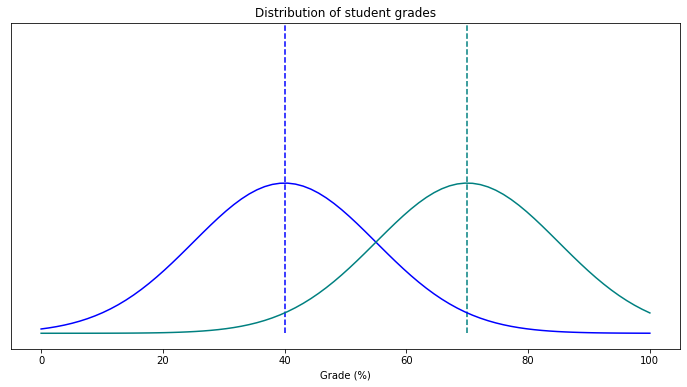

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 15
mean1=40
mean2=70   

# plot normal distribution for both means
maxy=0.055
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd),color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd),color='Teal')
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.ylim(top=maxy)
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)

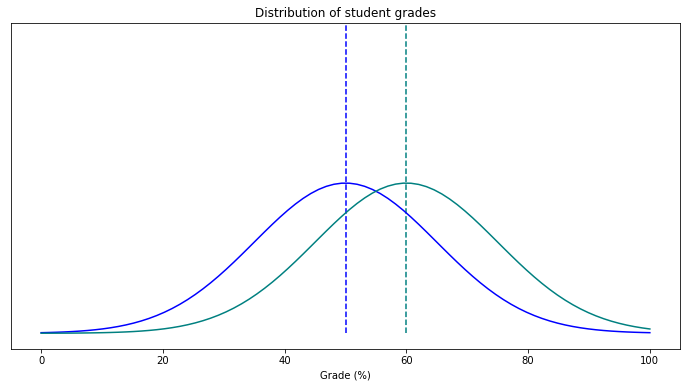

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 15
mean1=50
mean2=60   

# plot normal distribution for both means
maxy=0.055
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd),color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd),color='Teal')
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.ylim(top=maxy)
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)

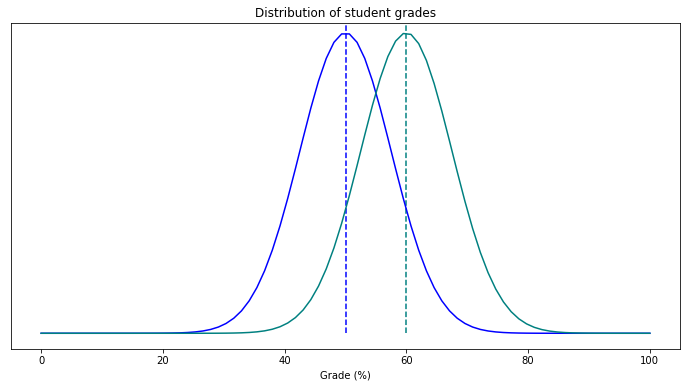

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 7.5
mean1=50
mean2=60

# plot normal distribution for both means
maxy=0.055
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd),color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd),color='Teal')
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.ylim(top=maxy)
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)

<body>
    <h1 style=font-size:200%;>Example extended: A third teaching method introduced</h1>
        <ul>
            <li>Add a 3rd independent group of students</li>
            <li>Group 3 taught with a combination of online and face-to-face</li>
        </ul>
        <p>Do you want to perform paired t-tests between all combinations of the groups?
        </p>
</body>

<body>
    <h1 style=font-size:200%;>One-way ANOVA</h1>
    <ul>
        <li>Analysis of Variance</li>
        <li>'one-way' as there is one <strong>factor</strong> - teaching method</li>
    </ul>
    <p>We are still comparing <strong>means</strong> so Hypotheses are now:
    </p>
    <ul style="list-style: none;">
        <li>$H_0:$ $\mu_1=\mu_2=\mu_3$<br>
            $H_1:$ There is at least one difference</li>
    </ul>
</body>

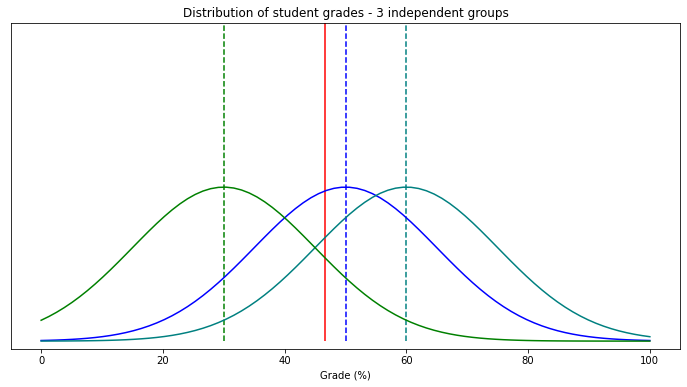

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 15
mean1=50
mean2=60
mean3=30
totmean = (mean1+mean2+mean3)/3
maxy = 0.055

# plot normal distribution for all means
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd), color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd), color='Teal')
plt.plot(x, stats.norm.pdf(x, mean3, sd), color='Green')
plt.ylim(top=maxy)
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.vlines(mean3, 0, maxy, colors='Green', linestyle='dashed')
plt.vlines(totmean, 0, maxy, colors='Red')
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades - 3 independent groups')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)

<body>
    <h1 style="font-size:200%;">One-way ANOVA Analysis</h1>
    <ul>
        <li>Compare <strong>Between Group Variation</strong> with <strong>Within Group Variation</strong></li>
        <li><strong>Between Group Variation</strong>: captures variances between group means caused by the grouping factor$\quad$</li>
        <li><strong>Within Group Variation</strong>: captures variances due to unexplained differences$\quad$</li>
    </ul>
</body>

<body>
    <h1 style=font-size:200%;>Test statistic</h1>
    <ul>
        <li>F statistic, measuring ratio:<br><br>
        $$\dfrac{\textrm{Between Group Variance}}{\textrm{Within Group Variance}}$$</li>
    </ul>
    <ul>
        <li>The greater 'Between Group Variance' is in comparison to 'Within Group Variance' the more likely sufficient evidence to reject $H_0$</li>
     </ul>
</body>

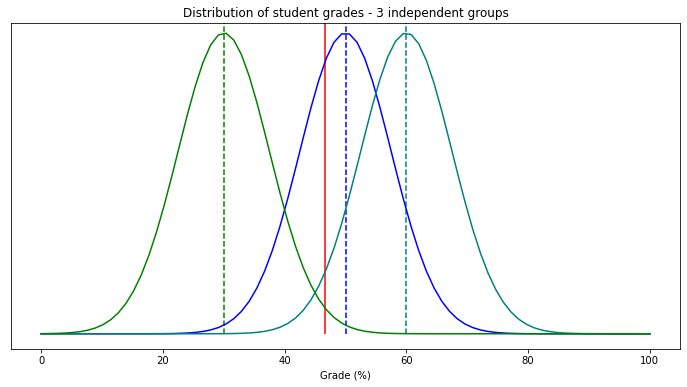

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 7.5
mean1=50
mean2=60
mean3=30
totmean = (mean1+mean2+mean3)/3
maxy = 0.055

# plot normal distribution for all means
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd), color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd), color='Teal')
plt.plot(x, stats.norm.pdf(x, mean3, sd), color='Green')
plt.ylim(top=maxy)
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.vlines(mean3, 0, maxy, colors='Green', linestyle='dashed')
plt.vlines(totmean, 0, maxy, colors='Red')
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades - 3 independent groups')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)

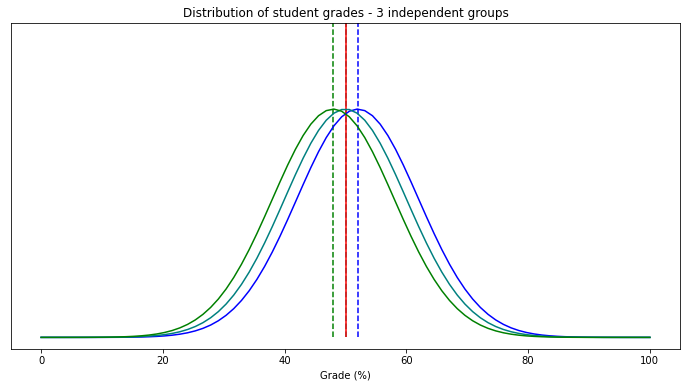

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sd = 10
mean1=52
mean2=50
mean3=48
totmean = (mean1+mean2+mean3)/3
maxy = 0.055

# plot normal distribution for all means
plot1 = plt.figure(figsize=(12,6))
x = np.linspace(0, 100, num=80)
plt.plot(x, stats.norm.pdf(x, mean1, sd), color='Blue')
plt.plot(x, stats.norm.pdf(x, mean2, sd), color='Teal')
plt.plot(x, stats.norm.pdf(x, mean3, sd), color='Green')
plt.ylim(top=maxy)
plt.vlines(mean1, 0, maxy, colors='Blue', linestyle='dashed')
plt.vlines(mean2, 0, maxy, colors='Teal', linestyle='dashed')
plt.vlines(mean3, 0, maxy, colors='Green', linestyle='dashed')
plt.vlines(totmean, 0, maxy, colors='Red')
plt.xlabel('Grade (%)')
plt.title('Distribution of student grades - 3 independent groups')
# remove y axis
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)

plt.show(plot1)